In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv('merged_flood_dataset3.csv')
df.head()

,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Historical Floods,Flood Occurred
0,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,0,1
1,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,1,0
2,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,1,1
3,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,1,0
4,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,0,0


In [32]:
df.isnull().sum()

Rainfall (mm)             0
Temperature (°C)          0
Humidity (%)              0
River Discharge (m³/s)    0
Water Level (m)           0
Elevation (m)             0
Historical Floods         0
Flood Occurred            0
dtype: int64

Outlier detection and removal with z-score

In [33]:
df.describe()

,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Historical Floods,Flood Occurred
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,89.966750,30.005296,63.203669,1371.429700,5.004948,1672.439136,1.500067,0.367400
std,73.946238,7.027201,21.425606,1248.510703,2.058595,2432.175651,1.389627,0.482105
min,0.014437,8.174251,20.001339,0.042161,-1.308482,-259.489506,0.000000,0.000000
25%,34.473299,25.068976,44.878787,468.149381,3.692547,248.336769,0.000000,0.000000
50%,65.756205,29.998888,63.289039,900.697851,5.018065,391.532192,1.000000,0.000000
75%,123.890205,34.875532,81.840642,1842.200756,6.306041,2229.252202,3.000000,1.000000
max,380.029886,52.569246,99.997772,5091.147479,10.877574,8846.894877,4.000000,1.000000


In [34]:
df['Flood Occurred'].unique()

array([1, 0])

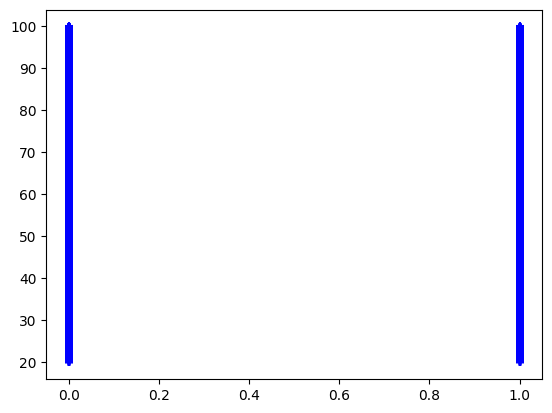

In [35]:
%matplotlib inline
plt.scatter(df['Flood Occurred'],df['Humidity (%)'],color="blue",marker="+")

In [36]:
df[df['Rainfall (mm)']>df['Rainfall (mm)'].mean()+3*df['Rainfall (mm)'].std()]

,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Historical Floods,Flood Occurred
15273,360.267442,26.630407,39.957564,220.684322,3.689481,500.364932,2,1
21591,323.505130,29.232793,60.207203,1087.392863,5.476067,409.388917,1,1
25173,380.029886,24.508857,68.590721,572.313566,3.497653,275.654148,0,0
27956,357.073171,18.013328,84.695038,1006.896528,7.122496,338.302655,4,1
28019,336.351329,30.944486,39.073554,294.923928,4.120869,95.772052,3,0


In [37]:
df1 = df[df['Rainfall (mm)']<=df['Rainfall (mm)'].mean()+3*df['Rainfall (mm)'].std()]
df1[df1['Rainfall (mm)']>df1['Rainfall (mm)'].mean()+3*df1['Rainfall (mm)'].std()]

,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Historical Floods,Flood Occurred


In [38]:
df1[df1['River Discharge (m³/s)']>df1['River Discharge (m³/s)'].mean()+3*df1['River Discharge (m³/s)'].std()]

,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Historical Floods,Flood Occurred


In [39]:
df1[df1['Elevation (m)']>df1['Elevation (m)'].mean()+3*df1['Elevation (m)'].std()]

,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Historical Floods,Flood Occurred


In [40]:
x = df1.drop(['Flood Occurred'],axis='columns')
x.head()

,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Historical Floods
0,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,0
1,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,1
2,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,1
3,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,1
4,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,0


In [41]:
y=df1['Flood Occurred']
y

0        1
1        0
2        1
3        0
4        0
        ..
29995    0
29996    0
29997    0
29998    0
29999    0
Name: Flood Occurred, Length: 29995, dtype: int64

In [42]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Flood Occurred, dtype: int64

Scaling x data(independent data) into matrix form

In [47]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x)
x_scale

array([[0.70608534, 0.58497779, 0.29890863, ..., 0.71590299, 0.06994598,
        0.        ],
       [0.17843305, 0.46411815, 0.09480527, ..., 0.83041638, 0.83349198,
        0.25      ],
       [0.33526017, 0.80551208, 0.12634812, ..., 0.48746541, 0.27072907,
        0.25      ],
       ...,
       [0.42943512, 0.51013993, 0.19073031, ..., 0.64110808, 0.05003771,
        0.        ],
       [0.45088507, 0.50935435, 0.23271014, ..., 0.67097999, 0.08482645,
        0.        ],
       [0.50280186, 0.4795506 , 0.25115192, ..., 0.34062116, 0.07539224,
        0.        ]], shape=(29995, 7))

Splitting dataset into 80% train data and 20% test data

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Logistic regression model training

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [50]:
model.score(X_test,y_test)

0.6369394899149858

Randomforest model training with hyperparameter tunning(randomizedsearchcv)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 300],  
    'max_depth': [10, 20, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(rf, param_grid, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1)
rf_random.fit(X_train, y_train)

print("Best RF Parameters:", rf_random.best_params_)
print("RF Score:", rf_random.best_score_)


Best RF Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
RF Score: 0.6381478172535945


In [58]:
X_train.columns

Index(['Rainfall (mm)', 'Temperature (°C)', 'Humidity (%)',
       'River Discharge (m³/s)', 'Water Level (m)', 'Elevation (m)',
       'Historical Floods'],
      dtype='object')

In [56]:
rf = RandomForestClassifier(n_estimators = 100, min_samples_split= 10, min_samples_leaf= 1, max_depth= 10,random_state = 42)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.6391065177529588

In [59]:
def predict_price(Rainfall , Temperature, Humidity ,River_Discharge, Water_Level, Elevation, Historical_Floods):
    v = np.zeros(len(x.columns))
    v[0]=Rainfall
    v[1]=Temperature
    v[2]=Humidity
    v[3]=River_Discharge
    v[4]=Water_Level
    v[5]=Elevation
    v[6]=Historical_Floods
    return rf.predict([v])[0]

In [60]:
print(predict_price(349,29,60,590,1.5,1600,1))

1


Saving model into pickle file

In [61]:
import pickle
with open('flood_predict.pickle','wb') as f:
    pickle.dump(rf,f)


In [62]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open('flood_columns.json','w') as f:
    f.write(json.dumps(columns))